Notebook to classify the naive templates as El, Sp, Im/SB

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
import copy

from modules import get_bandpass_dict, Sed

In [2]:
# plotting style
%config InlineBackend.figure_format = 'retina'
plt.style.use('paper.mplstyle')
twocol = 7.1014
onecol = 3.35

In [3]:
bandpass_dict = get_bandpass_dict()

Calculate colors for each set of templates

In [4]:
cwwsb4 = np.loadtxt('templates/cwwsb4.list',dtype=str)
xcolor0 = []
ycolor0 = []
for template in cwwsb4:
    name = 'templates/'+template
    x,y = np.loadtxt(name,unpack=True)
    sed = Sed(x,y)
    
    fluxes = sed.fluxlist(bandpass_dict,['NUV','u','g'])
    xcolor0.append(2.5*np.log10(fluxes[1]/fluxes[0]))
    ycolor0.append(2.5*np.log10(fluxes[2]/fluxes[1]))
    
naive = ['naive'+str(i+1)+'.sed' for i in range(20)]
xcolor1 = []
ycolor1 = []
for template in naive:
    name = 'templates/'+template
    x,y = np.loadtxt(name,unpack=True)
    sed = Sed(x,y)
    
    fluxes = sed.fluxlist(bandpass_dict,['NUV','u','g'])
    xcolor1.append(2.5*np.log10(fluxes[1]/fluxes[0]))
    ycolor1.append(2.5*np.log10(fluxes[2]/fluxes[1]))
    

Function that matches the colors to the closest CWWSB4 template

In [5]:
def closest(x,y):
    distances = []
    for i,j in zip(xcolor0,ycolor0):
        distances.append((x-i)**2 + (y-j)**2)
    return np.array(distances).argmin()

Evaluate the function on a grid to make the background of the plot

In [6]:
# Calculate the nearest neighbor grid

X = np.linspace(-2,3,1000)
Y = np.linspace(-0.8,1,1000)
Z = []
for y in Y:
    row = []
    for x in X:
        row.append(closest(x,y))
    Z.append(row)

Plot the template colors on top of this grid

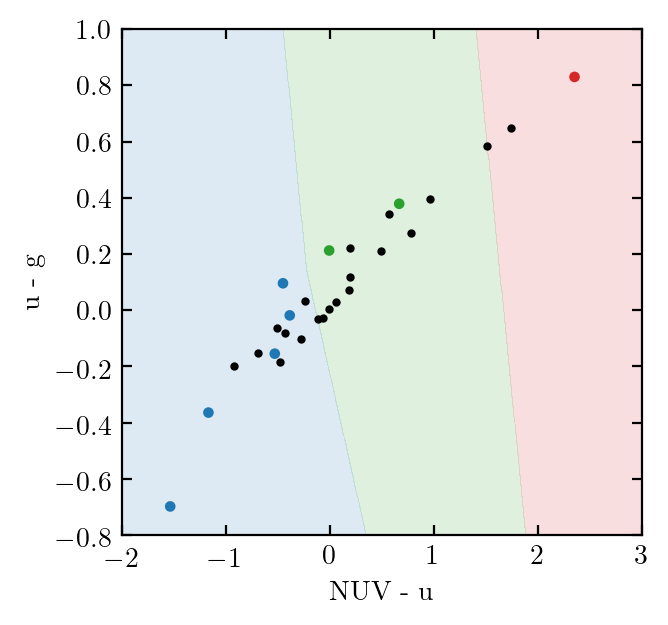

In [8]:
fig,ax = plt.subplots()#figsize=(8,8))

ax.contourf(X,Y,Z,[0,0.5,2.5,10],colors=['C3','C2','C0'],alpha=0.15)

ax.scatter(xcolor0,ycolor0,c=['C3','C2','C2','C0','C0','C0','C0','C0'],s=8)

ax.scatter(xcolor1,ycolor1,c='k')


#for i,(x,y) in enumerate(zip(xcolor1,ycolor1)):
#    ax.annotate(i+1,(x+0.1,y-0.05))
#    if i == 7:
#        break

ax.set_xlim(-2,3)
ax.set_ylim(-0.8,1)

ax.set_xlabel('NUV - u')
ax.set_ylabel('u - g')

plt.show()